In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [3]:
def draw_line(coef,intercept, mi, ma,):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

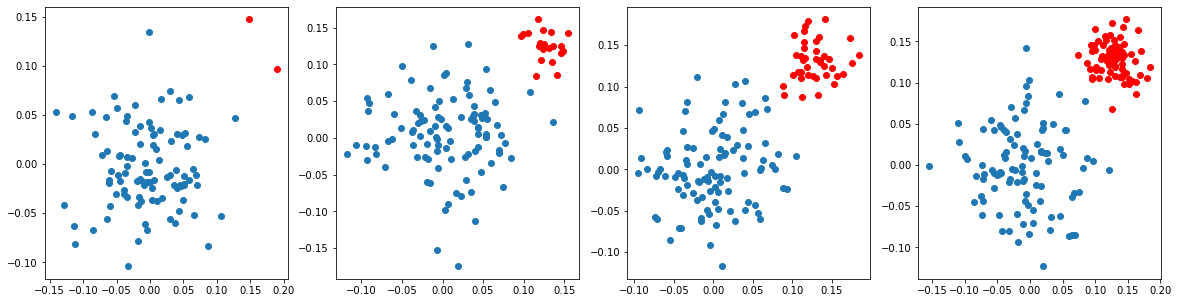

In [4]:
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
df_X,df_Y=[],[]
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
    
    df_X.append(X)
    df_Y.append(y)

df_X=np.array(df_X)
df_Y=np.array(df_Y)
plt.show()

## Task 1: SVC

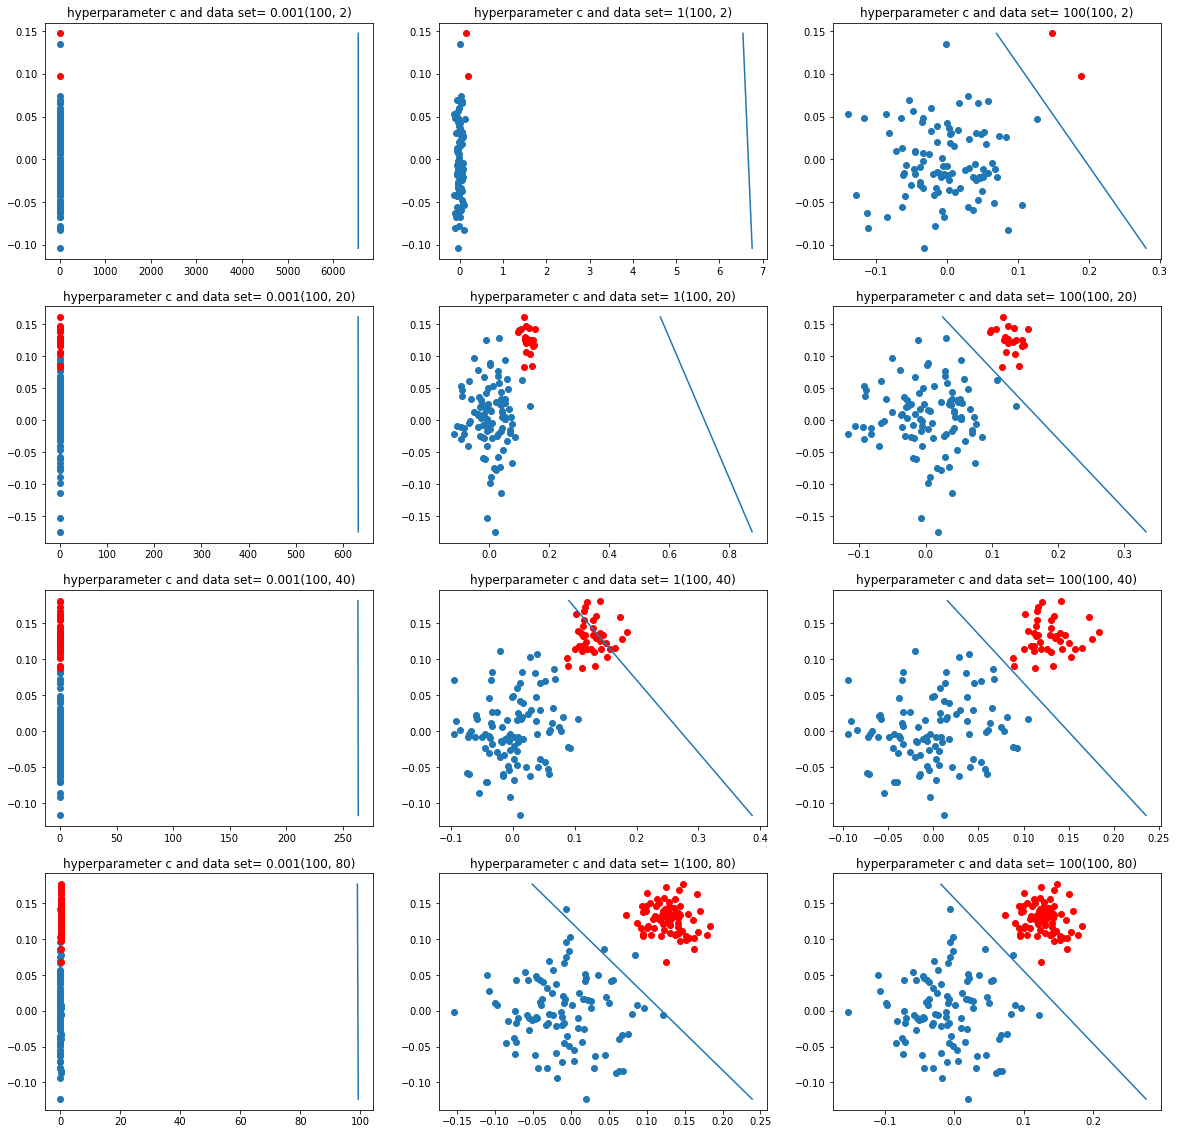

In [17]:
fig=plt.figure(figsize=(20,20))
h=0
c_range=[0.001,1,100]

for i in range(4):
    X=df_X[i]
    X_p=X[:99,:]
    X_n=X[100:,:]
    Y=df_Y[i]
        
    for j in range(3):
        h+=1
        clf=SVC(kernel='linear',C=c_range[j])
        clf.fit(X,Y)
        plt.subplot(4,3,h)
        plt.title("hyperparameter c and data set= "+str(c_range[j]) +str(ratios[i]))
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
        draw_line(clf.coef_[0],clf.intercept_,min(X[:,1]),max(X[:,1]))
    
plt.show()

### 1. Implemented the SVM with linear kernel on imbalanced data set.
### 2. As C increases the variance also increases and bias reduces.
### 3. C is inversely proportionally to the hyperparameter lambda the regularizing term.


## Task 2: Applying LR

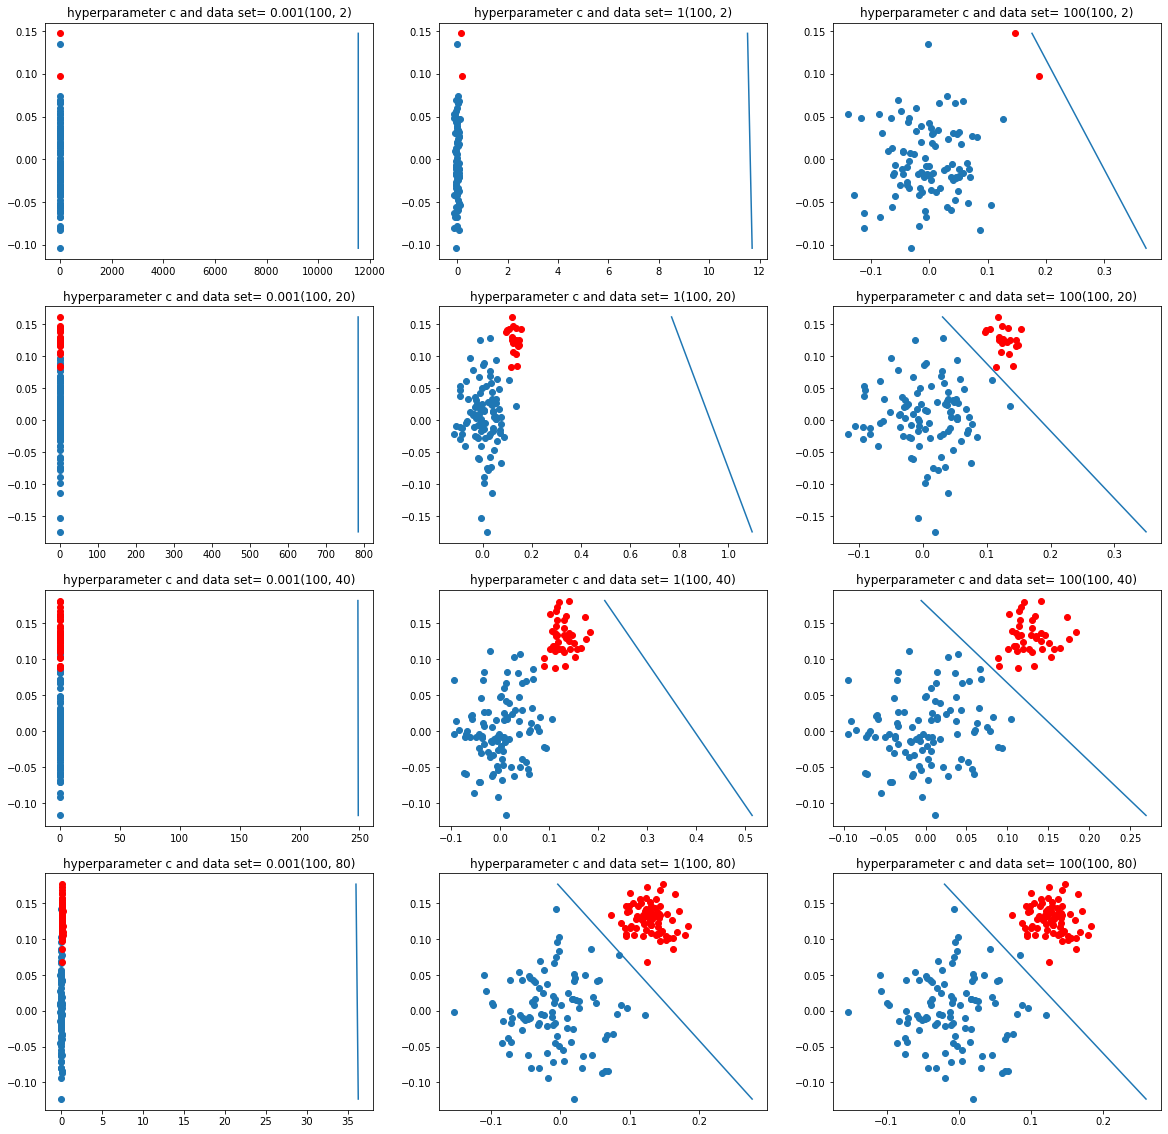

In [18]:
fig=plt.figure(figsize=(20,20))
h=0
c_range=[0.001,1,100]

for i in range(4):
    X=df_X[i]
    X_p=X[:99,:]
    X_n=X[100:,:]
    Y=df_Y[i]
        
    for j in range(3):
        h+=1
        clf=LogisticRegression(C=c_range[j])
        clf.fit(X,Y)
        plt.subplot(4,3,h)
        plt.title("hyperparameter c and data set= "+str(c_range[j]) +str(ratios[i]))
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
        draw_line(clf.coef_[0],clf.intercept_,min(X[:,1]),max(X[:,1]))
    
plt.show()

### 1.Implemented the Logistic Regression on imbalanced data set.
### 2. As C increases the variance also increases and bias reduces.
### 3. C is inversely proportionally to the hyperparameter lambda the regularizing term.
### 4. As compare to SVM ,Logistic regression is less effective on imbalanced data set as seen in 100:2 ratio data set with C=100